<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P12_CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")

print(df.shape)
df.head()

(13954, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.isnull().mean()

,0
Time,0.000000
V1,0.000000
V2,0.000000
V3,0.000000
V4,0.000000
V5,0.000000
V6,0.000000
V7,0.000000
V8,0.000000
V9,0.000000


In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
import pandas as pd

# Numerical columns (exclude Class)
num_cols = df.drop(columns=['Class']).columns

outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

print(outlier_counts)

{'Time': 0, 'V1': 363, 'V2': 757, 'V3': 530, 'V4': 180, 'V5': 894, 'V6': 1276, 'V7': 420, 'V8': 1454, 'V9': 357, 'V10': 661, 'V11': 94, 'V12': 74, 'V13': 59, 'V14': 362, 'V15': 242, 'V16': 258, 'V17': 398, 'V18': 577, 'V19': 345, 'V20': 1364, 'V21': 1053, 'V22': 183, 'V23': 967, 'V24': 203, 'V25': 308, 'V26': 16, 'V27': 1715, 'V28': 2604, 'Amount': 1665}


In [9]:
outlier_rows = pd.DataFrame()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    temp = df[(df[col] < lower) | (df[col] > upper)]
    outlier_rows = pd.concat([outlier_rows, temp])

# Remove duplicates
outlier_rows = outlier_rows.drop_duplicates()

print("Total unique outlier rows:", outlier_rows.shape[0])

Total unique outlier rows: 6627


In [10]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

amount_outliers = df[(df['Amount'] < lower) | (df['Amount'] > upper)]
amount_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
20,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0.0
51,36,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0.0


In [11]:
df['Hour'] = df['Time'] // 3600

In [12]:
df.drop('Time', axis=1, inplace=True)

In [13]:
df['Class'].value_counts()

,count
Class,
0.0,13897
1.0,56


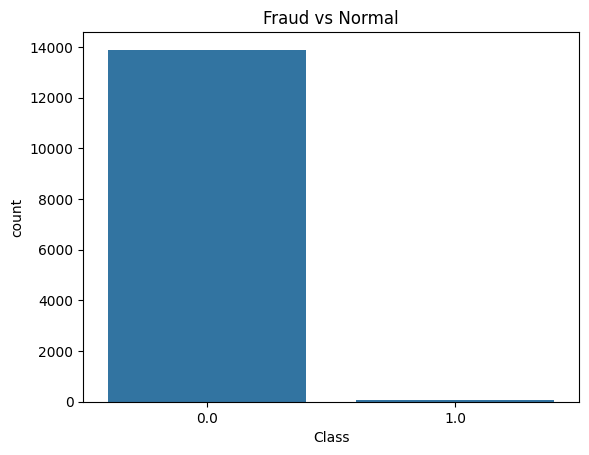

,proportion
Class,
0.0,0.995987
1.0,0.004013


In [14]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal")
plt.show()

df['Class'].value_counts(normalize=True)

In [15]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.995987
1.0,0.004013


In [16]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [17]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [18]:
legit.Amount.describe()

,Amount
count,13897.000000
mean,63.773909
std,177.164503
min,0.000000
25%,5.770000
50%,15.900000
75%,52.370000
max,7712.430000


In [19]:
fraud.Amount.describe()

,Amount
count,56.000000
mean,90.815893
std,310.308450
min,0.000000
25%,1.000000
50%,1.000000
75%,1.025000
max,1809.680000


In [20]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,-0.305324,...,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909,2.38001
1.0,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,-7.502753,...,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893,3.00000


In [21]:
#Number of Fraudlent transactions-->492
legit_sample=legit.sample(n=492)


In [22]:
#Concatenating two dataframe
df2=pd.concat([legit_sample,fraud],axis=0)

In [23]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
4443,1.245254,-0.685859,0.485028,-0.652094,-0.805019,-0.026855,-0.846076,0.091531,0.458264,0.378585,...,-0.550426,0.093463,-0.415939,0.084831,-0.488829,-0.022693,0.005715,60.96,0.0,1
11740,-0.156644,0.273837,1.832835,-1.157759,0.232211,0.647588,-0.015295,-0.053286,2.425407,-1.413099,...,0.295450,-0.356686,-1.004096,-0.159704,-0.696090,0.053575,-0.084305,5.29,0.0,5
2700,-0.474569,0.439526,1.245704,-0.653699,0.762569,-0.568132,1.008283,-0.322490,-0.217136,-0.504681,...,-0.004622,-0.105310,-0.419292,-0.262475,0.214182,-0.105051,-0.080077,46.40,0.0,0
801,-4.130219,3.794249,-1.928831,0.048061,-2.532346,-1.469961,-1.866922,3.007835,-0.332471,-0.215929,...,-0.961563,0.383984,0.293528,0.283096,0.115836,0.011618,-0.003323,11.97,0.0,0
10417,-0.716024,1.433246,1.413276,0.847704,0.070757,-0.565428,0.714437,-0.197092,1.192028,0.643245,...,0.332516,-0.147540,0.447269,-0.242311,-0.400890,0.428812,0.109856,7.03,0.0,4


In [24]:
df2.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
11880,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,...,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0,5
12070,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,-13.002709,...,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0,5
12108,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,-12.916636,...,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0,5
12261,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,-12.830657,...,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0,5
12369,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,-12.744761,...,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0,6


In [25]:
df2['Class'].value_counts()

,count
Class,
0.0,492
1.0,56


In [26]:
df2.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.289642,0.274722,0.919040,0.220872,-0.106706,0.157034,-0.010440,0.060633,0.997320,-0.293835,...,-0.087118,-0.126538,-0.020100,0.011658,0.077066,0.035330,0.006310,0.000842,74.820549,2.317073
1.0,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,-7.502753,...,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893,3.000000


In [27]:
X=df2.drop(columns='Class',axis=1)
Y=df2['Class']

In [28]:
print(X)

              V1         V2         V3         V4         V5        V6  \
4443    1.245254  -0.685859   0.485028  -0.652094  -0.805019 -0.026855   
11740  -0.156644   0.273837   1.832835  -1.157759   0.232211  0.647588   
2700   -0.474569   0.439526   1.245704  -0.653699   0.762569 -0.568132   
801    -4.130219   3.794249  -1.928831   0.048061  -2.532346 -1.469961   
10417  -0.716024   1.433246   1.413276   0.847704   0.070757 -0.565428   
...          ...        ...        ...        ...        ...       ...   
11880 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8        V9        V10  ...       V21       V22  \
4443   -0.846076  0.091531  0.45826

In [29]:
print(Y)

4443     0.0
11740    0.0
2700     0.0
801      0.0
10417    0.0
        ... 
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, Length: 548, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(548, 30) (438, 30) (110, 30)


In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [35]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy on Training data:',training_data_accuracy)
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Training data: 0.9931506849315068
Accuracy on Test data: 1.0


In [37]:
df.dropna(inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']
print(f"NaNs in X after dropna: {X.isnull().sum().sum()}")

NaNs in X after dropna: 0


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"NaNs in X_scaled after scaling: {np.isnan(X_scaled).sum()}")

NaNs in X_scaled after scaling: 0


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
print(f"NaNs in X_scaled before PCA: {np.isnan(X_scaled).sum()}")
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("After PCA:", X_pca.shape)

NaNs in X_scaled before PCA: 0
Original shape: (13953, 30)
After PCA: (13953, 25)


In [40]:
import numpy as np
print("Number of components:", pca.n_components_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

Number of components: 25
Total explained variance: 0.9571869444535982


In [41]:
import pandas as pd

pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

In [42]:
X_pca_df['Class'] = y.values

In [43]:
from sklearn.model_selection import train_test_split

X = X_pca_df.drop('Class', axis=1)
y = X_pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [45]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
models = {'Logistic Regression': lr, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("\n", name)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


 Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       0.90      0.82      0.86        11

    accuracy                           1.00      2791
   macro avg       0.95      0.91      0.93      2791
weighted avg       1.00      1.00      1.00      2791

ROC-AUC: 0.9976128188358403

 Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2791
   macro avg       1.00      0.95      0.98      2791
weighted avg       1.00      1.00      1.00      2791

ROC-AUC: 0.9526487900588619


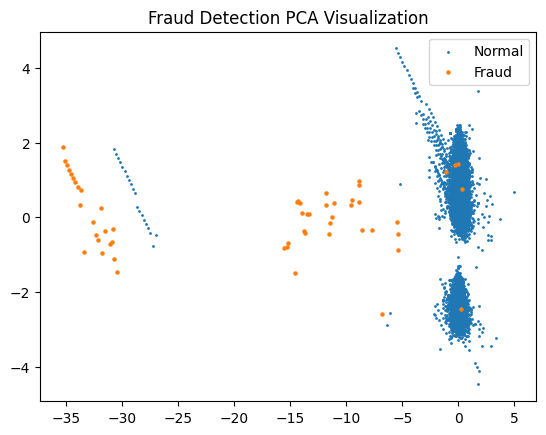

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_2 = PCA(n_components=2)
X_vis = pca_2.fit_transform(X_scaled)

plt.scatter(X_vis[y==0,0], X_vis[y==0,1], s=1, label='Normal')
plt.scatter(X_vis[y==1,0], X_vis[y==1,1], s=5, label='Fraud')
plt.legend()
plt.title("Fraud Detection PCA Visualization")
plt.show()

### Next Step: Handling Class Imbalance with SMOTE

The dataset is highly imbalanced, with a significantly smaller number of fraudulent transactions compared to normal ones. While `stratify` helps in splitting, applying techniques like SMOTE (Synthetic Minority Over-sampling Technique) to the training data can create synthetic samples of the minority class, helping models learn better patterns for fraud detection.

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Shape of X_train before SMOTE:', X_train.shape)
print('Shape of X_train after SMOTE:', X_train_res.shape)
print('Class distribution of y_train after SMOTE:')
print(y_train_res.value_counts())

Shape of X_train before SMOTE: (11162, 25)
Shape of X_train after SMOTE: (22234, 25)
Class distribution of y_train after SMOTE:
Class
0.0    11117
1.0    11117
Name: count, dtype: int64


### Re-training models with SMOTE-enhanced data

Now, let's retrain the Logistic Regression and Random Forest models using the SMOTE-resampled training data and evaluate their performance.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [52]:
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [53]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2791
   macro avg       1.00      0.95      0.98      2791
weighted avg       1.00      1.00      1.00      2791

ROC-AUC: 0.948839110529758


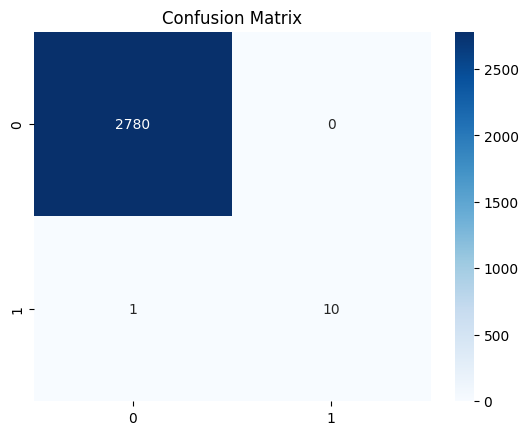

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

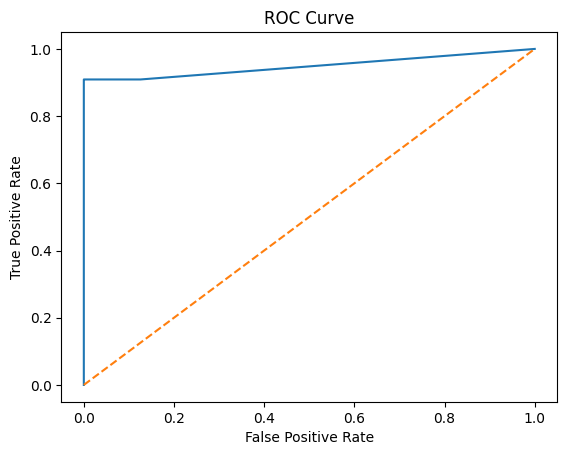

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [56]:
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_res, y_train_res)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)

models_smote = {'Logistic Regression (SMOTE)': lr_smote, 'Random Forest (SMOTE)': rf_smote}

for name, model in models_smote.items():
    y_pred_smote = model.predict(X_test)
    y_prob_smote = model.predict_proba(X_test)[:,1]

    print("\n", name)
    print(classification_report(y_test, y_pred_smote))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob_smote))


 Logistic Regression (SMOTE)
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2780
         1.0       0.29      0.91      0.44        11

    accuracy                           0.99      2791
   macro avg       0.65      0.95      0.72      2791
weighted avg       1.00      0.99      0.99      2791

ROC-AUC: 0.9928384565075213

 Random Forest (SMOTE)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2791
   macro avg       1.00      0.95      0.98      2791
weighted avg       1.00      1.00      1.00      2791

ROC-AUC: 0.948839110529758


#New Prediction


In [66]:
import pandas as pd
import numpy as np

new_data = {
    'Time': 50000,
    'V1': -1.2,
    'V2': 0.5,
    'V3': -0.3,
    'V4': 1.2,
    'V5': -0.1,
    'V6': 0.4,
    'V7': -0.2,
    'V8': 0.1,
    'V9': -0.5,
    'V10': -0.3,
    'V11': 0.6,
    'V12': -0.7,
    'V13': 0.2,
    'V14': -0.8,
    'V15': 0.1,
    'V16': -0.2,
    'V17': 0.3,
    'V18': -0.1,
    'V19': 0.2,
    'V20': 0.05,
    'V21': -0.02,
    'V22': 0.1,
    'V23': -0.03,
    'V24': 0.04,
    'V25': 0.02,
    'V26': -0.01,
    'V27': 0.03,
    'V28': 0.01,
    'Amount': 250
}

new_df = pd.DataFrame([new_data])

### Imports
This cell imports necessary libraries for data manipulation, visualization, machine learning models, and evaluation metrics:
- `pandas` for data structures and analysis.
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `StandardScaler` for feature scaling.
- `IsolationForest` (although not used in the final model, it was imported earlier).
- `classification_report`, `confusion_matrix`, `accuracy_score`, `roc_auc_score`, and `roc_curve` for model evaluation.
- `train_test_split` for splitting data.
- `LogisticRegression` and `RandomForestClassifier` for modeling.
- `SMOTE` from `imblearn` for handling class imbalance.
- `PCA` for dimensionality reduction.

### Load Data and Initial Inspection
This cell loads the `creditcard.csv` file into a pandas DataFrame named `df`. It then prints the shape of the DataFrame (number of rows and columns) and displays the first 5 rows using `df.head()` to give a quick overview of the data structure and content.

### Check for Missing Values (Percentage)
This cell calculates the percentage of missing values (`NaN`) for each column in the DataFrame. `df.isnull()` returns a boolean DataFrame indicating missing values, and `.mean()` calculates the average (percentage) of `True` values (missing values) for each column.

### Check for Missing Values (Count)
This cell calculates the absolute count of missing values (`NaN`) for each column in the DataFrame using `df.isnull().sum()`. This helps in identifying columns with missing data and the extent of the missingness.

### Descriptive Statistics
This cell generates descriptive statistics for all numerical columns in the DataFrame using `df.describe()`. This includes count, mean, standard deviation, minimum, maximum, and quartile values (25th, 50th, 75th percentile), providing insights into the distribution and range of the data.

### DataFrame Information
This cell displays a concise summary of the DataFrame using `df.info()`. It shows the number of entries, the number of columns, column names, non-null counts, data types of each column, and memory usage. This is crucial for understanding data types and identifying columns with missing values.

### Display Column Names
This cell simply prints all the column names present in the DataFrame using `df.columns`. This is useful for quickly referencing column names, especially in DataFrames with many columns.

### Outlier Detection (Counts per Column)
This cell performs outlier detection for all numerical columns (excluding 'Class') using the Interquartile Range (IQR) method. It calculates Q1 (25th percentile), Q3 (75th percentile), and IQR for each column. It then identifies values outside the range `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]` as outliers and stores the count of outliers for each column in a dictionary `outlier_counts`.

### Collecting Unique Outlier Rows
Building upon the previous outlier detection, this cell iterates through all numerical columns to identify and collect all rows that contain at least one outlier based on the IQR method. It concatenates these outlier rows into a new DataFrame `outlier_rows` and then removes duplicate rows to count the total number of unique rows containing outliers across any feature.

### Specific Outlier Check for 'Amount'
This cell specifically checks for outliers in the 'Amount' column using the same IQR method. It calculates the lower and upper bounds for 'Amount' and then filters the DataFrame to display the rows where 'Amount' falls outside these bounds. This provides a focused view on transactions with extreme 'Amount' values.

### Create 'Hour' Feature
This cell creates a new feature called 'Hour' by dividing the 'Time' column (which represents seconds elapsed since the first transaction) by 3600 (seconds in an hour) and using integer division (`//`) to get the hour of the transaction.

### Drop 'Time' Column
After extracting the 'Hour' feature, the original 'Time' column is dropped from the DataFrame using `df.drop('Time', axis=1, inplace=True)`. This is done because 'Hour' provides a more interpretable time-related feature, and the raw 'Time' (seconds elapsed) might not be directly useful for the model.

### Analyze 'Class' Distribution
This cell uses `df['Class'].value_counts()` to count the occurrences of each unique value in the 'Class' column. This is crucial for understanding the class distribution (e.g., how many legitimate vs. fraudulent transactions there are) and checking for class imbalance.

### Visualize 'Class' Distribution
This cell visualizes the distribution of the 'Class' column using a count plot from `seaborn`. It also prints the normalized value counts, showing the proportion of each class, which clearly highlights the severe class imbalance in the dataset (many more legitimate transactions than fraudulent ones).

### Separate Legitimate and Fraudulent Transactions
This cell separates the original DataFrame `df` into two new DataFrames: `legit` for legitimate transactions (where `Class` is 0) and `fraud` for fraudulent transactions (where `Class` is 1). This separation is often done for analysis or to prepare for handling class imbalance.

### Display Shapes of Separated DataFrames
This cell prints the number of rows and columns (`shape`) for both the `legit` and `fraud` DataFrames. This confirms the counts of legitimate and fraudulent transactions after separation.

### Descriptive Statistics for 'Amount' in Legitimate Transactions
This cell provides descriptive statistics specifically for the 'Amount' column within the `legit` DataFrame. This helps to understand the typical transaction amounts for non-fraudulent activities.

### Descriptive Statistics for 'Amount' in Fraudulent Transactions
This cell provides descriptive statistics specifically for the 'Amount' column within the `fraud` DataFrame. This helps to understand the typical transaction amounts for fraudulent activities, which can differ significantly from legitimate ones.

### Compare Mean Values by Class
This cell calculates the mean of all features, grouped by the 'Class' (0 for legitimate, 1 for fraud). This comparison can reveal significant differences in feature values between the two classes, which are important indicators for fraud detection.

### Sampling Legitimate Transactions
Due to the severe class imbalance (many more legitimate transactions than fraudulent ones), this cell creates a balanced dataset by sampling a number of legitimate transactions equal to the number of fraudulent transactions. `legit.sample(n=492)` randomly selects 492 rows from the `legit` DataFrame.

### Concatenate to Create Balanced DataFrame
This cell concatenates the sampled `legit_sample` DataFrame with the `fraud` DataFrame to create a new, balanced DataFrame called `df2`. The `axis=0` argument ensures that the DataFrames are stacked row-wise.

### Display Head of Balanced DataFrame
This cell displays the first 5 rows of the newly created balanced DataFrame `df2` using `df2.head()`. This helps to confirm the structure and content of the balanced dataset.

### Display Tail of Balanced DataFrame
This cell displays the last 5 rows of the balanced DataFrame `df2` using `df2.tail()`. This often shows the fraudulent transactions, as they were concatenated at the end.

### 'Class' Distribution in Balanced DataFrame
This cell checks the value counts of the 'Class' column in the `df2` DataFrame. After balancing, it should show an equal (or nearly equal) number of legitimate (0.0) and fraudulent (1.0) transactions.

### Compare Mean Values in Balanced DataFrame
This cell calculates the mean of all features, grouped by the 'Class' in the balanced DataFrame `df2`. This step is similar to the earlier `groupby`, but now on the balanced dataset, which can sometimes provide a clearer picture of feature differences without the strong influence of class imbalance.

### Separate Features (X) and Target (Y)
This cell separates the DataFrame `df2` into features (`X`) and the target variable (`Y`). `X` contains all columns except 'Class', and `Y` contains only the 'Class' column. This is a standard step before training a machine learning model.

### Display Features (X)
This cell prints the `X` DataFrame, which contains the features used for training the model. It shows a glimpse of the independent variables.

### Display Target (Y)
This cell prints the `Y` Series, which contains the target variable ('Class'). It shows the dependent variable that the model will try to predict.

### Split Data into Training and Test Sets
This cell splits the features (`X`) and target (`Y`) into training and testing sets using `train_test_split`.
- `test_size=0.2` allocates 20% of the data for testing.
- `stratify=Y` ensures that the proportion of classes (legitimate vs. fraud) is maintained in both the training and testing sets, which is crucial for imbalanced datasets.
- `random_state=2` ensures reproducibility of the split.

### Display Shapes of Training and Test Sets
This cell prints the shapes of the original feature set (`X`), the training feature set (`X_train`), and the testing feature set (`X_test`). This verifies the number of samples and features in each split.

### Initialize Logistic Regression Model
This cell initializes a Logistic Regression model. Logistic Regression is a linear model used for binary classification. `import numpy as np` is included here but `numpy` was already imported at the beginning of the notebook.

### Train Logistic Regression Model
This cell trains the initialized Logistic Regression model using the training features (`X_train`) and training target (`Y_train`). The `model.fit()` method learns the relationships between the features and the target variable.

### Evaluate Training Data Accuracy
This cell makes predictions on the training data (`X_train`) using the trained model. It then calculates the `accuracy_score` by comparing these predictions (`X_train_prediction`) with the actual training target values (`Y_train`). This indicates how well the model learned the training data.

### Evaluate Test Data Accuracy
This cell makes predictions on the unseen test data (`X_test`) using the trained model. It then calculates the `accuracy_score` by comparing these predictions (`X_test_prediction`) with the actual test target values (`Y_test`). This is a more reliable measure of the model's generalization performance.

### Display Model Accuracies
This cell prints the calculated accuracy scores for both the training data and the test data. These scores help in understanding if the model is overfitting (high training accuracy, low test accuracy) or underfitting (low accuracy on both).

### Handle Missing Values and Scale Features
This cell first drops any rows with missing values from the DataFrame `df` using `df.dropna(inplace=True)`. Then, it separates features (`X`) and target (`y`). Finally, it initializes a `StandardScaler` and applies it to the features `X` using `scaler.fit_transform(X)`. Scaling is important to normalize the range of features, which helps many machine learning algorithms perform better.

### Apply Principal Component Analysis (PCA)
This cell applies PCA for dimensionality reduction. It initializes `PCA(n_components=0.95)`, meaning it aims to retain 95% of the variance in the data. `X_pca = pca.fit_transform(X_scaled)` applies the PCA transformation to the scaled features. It then prints the original and new shapes of the data to show the reduction in dimensions.

### PCA Components and Explained Variance
This cell prints the number of principal components retained by PCA and the total cumulative explained variance ratio. This confirms that 95% of the variance is captured by the selected number of components.

### Create DataFrame from PCA Components
This cell converts the `X_pca` NumPy array (which contains the principal components) into a pandas DataFrame `X_pca_df`. It assigns meaningful column names like 'PC1', 'PC2', etc.

### Add Target Variable to PCA DataFrame
This cell adds the 'Class' target variable (`y`) back to the `X_pca_df` DataFrame. This is necessary for subsequent splitting and modeling, keeping the features and target aligned.

### Train-Test Split with PCA Data
This cell performs another train-test split, this time using the PCA-transformed features (`X`, which is `X_pca_df` without 'Class') and the target (`y`). Similar to before, `test_size=0.2`, `random_state=42`, and `stratify=y` are used for consistent and balanced splitting.

### Import Models and Metrics
This cell imports the necessary machine learning models (`LogisticRegression`, `RandomForestClassifier`) and evaluation metrics (`SMOTE` for oversampling, `roc_auc_score` for ROC AUC calculation).

### Train Logistic Regression Model (Original Split)
This cell initializes and trains a Logistic Regression model (`lr`) using the `X_train` and `y_train` from the PCA-transformed data (before SMOTE). `max_iter=1000` is set to ensure convergence.

### Train Random Forest Model (Original Split)
This cell initializes and trains a Random Forest Classifier model (`rf`) using the `X_train` and `y_train` from the PCA-transformed data (before SMOTE). `random_state=42` ensures reproducibility.

### Evaluate Models Before SMOTE
This cell iterates through the trained Logistic Regression and Random Forest models. For each model, it:
1. Makes predictions (`y_pred`) on the `X_test` data.
2. Calculates predicted probabilities for the positive class (`y_prob`).
3. Prints a `classification_report` (showing precision, recall, f1-score, support).
4. Prints the `ROC-AUC` score, which is a common metric for imbalanced classification problems.

### PCA Visualization (2D)
This cell performs PCA to reduce the scaled features to just 2 principal components (`pca_2 = PCA(n_components=2)`). It then uses `matplotlib.pyplot.scatter` to visualize the data in a 2D plot, distinguishing between 'Normal' (Class 0) and 'Fraud' (Class 1) transactions. This helps to visually inspect the separation of classes after dimensionality reduction.

### Apply SMOTE to Training Data
This cell addresses the class imbalance by applying Synthetic Minority Over-sampling Technique (SMOTE) to the training data. `sm = SMOTE(random_state=42)` initializes the SMOTE object, and `sm.fit_resample(X_train, y_train)` generates synthetic samples for the minority class. It then prints the shapes and class distribution to show the effect of SMOTE.

### Re-split Data for SMOTE (Redundant)
This cell is redundant as `X_train`, `X_test`, `y_train`, `y_test` were already set in `Rdp8V4Sw66fV`. It re-splits the `X_pca` and `y` data, which is not strictly necessary after the previous split in `Rdp8V4Sw66fV` if the goal is to only apply SMOTE to the *already existing* `X_train`, `y_train`.

### Apply SMOTE to Training Data (Corrected Split)
This cell correctly applies SMOTE to the `X_train` and `y_train` sets that were created after PCA and the train-test split. `smote = SMOTE(random_state=42)` initializes SMOTE, and `smote.fit_resample(X_train, y_train)` balances the training data by generating synthetic samples for the minority class. The output shows the new shapes and class distribution.

### Re-train Model with SMOTE Data
This cell re-trains the `model` (which was previously `rf = RandomForestClassifier`) using the SMOTE-resampled training data (`X_train_res`, `y_train_res`). This is to see if balancing the classes improves model performance, especially recall for the minority class.

### Re-evaluate Model After SMOTE
This cell evaluates the re-trained model on the original `X_test` data (which was not resampled). It makes predictions, calculates probabilities, and prints the `classification_report` and `ROC-AUC` score. Comparing these metrics to the pre-SMOTE evaluation shows the impact of SMOTE on model performance.

### Visualize Confusion Matrix
This cell generates and visualizes a confusion matrix for the model's predictions on the test set. A confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of classification performance, especially useful for imbalanced datasets.

### Plot ROC Curve
This cell plots the Receiver Operating Characteristic (ROC) curve. It calculates the False Positive Rate (FPR) and True Positive Rate (TPR) for different classification thresholds using `roc_curve()` and then plots them. The diagonal dashed line represents a random classifier. A curve that hugs the top-left corner indicates better performance.

### Evaluate Both Models After SMOTE
This cell re-trains both Logistic Regression and Random Forest models using the SMOTE-resampled data and then evaluates their performance on the test set. It prints the `classification_report` and `ROC-AUC` score for each model, allowing for a direct comparison of how each model benefits (or doesn't) from SMOTE.

### Create New Data for Prediction
This cell defines a dictionary `new_data` representing a single hypothetical credit card transaction with various features. It then converts this dictionary into a pandas DataFrame `new_df`. This `new_df` will be used to demonstrate how to make a prediction on new, unseen data.

### Extract 'Hour' for New Data
Similar to the preprocessing of the training data, this cell extracts the 'Hour' feature from the 'Time' column in the `new_df` by performing integer division by 3600.

### Drop 'Time' Column from New Data
After extracting 'Hour', the original 'Time' column is dropped from `new_df` using `new_df.drop('Time', axis=1, inplace=True)`. This ensures that `new_df` has the same features as the data the model was trained on, except for the target 'Class'.

### Scale New Data
This cell applies the previously fitted `StandardScaler` to the `new_df` features using `scaler.transform(new_df)`. It's crucial to use `transform` (not `fit_transform`) here, as the scaler was already fitted on the training data. This ensures consistency in scaling.

### Apply PCA to New Data
This cell applies the previously fitted `PCA` transformer to the scaled `new_df` features using `pca.transform(new_scaled)`. Again, `transform` (not `fit_transform`) is used to apply the same dimensionality reduction learned from the training data to the new data.

### Make Prediction on New Data
This cell uses the final trained model (`model`, which is the Random Forest model trained with SMOTE data) to make a prediction on the preprocessed `new_pca` data. It outputs the predicted class (`prediction[0]`, typically 0 for legitimate or 1 for fraud) and the probability of it being a fraudulent transaction (`probability[0]`).

In [67]:
new_df['Hour'] = new_df['Time'] // 3600

In [68]:
new_df.drop('Time', axis=1, inplace=True)

In [69]:
new_scaled = scaler.transform(new_df)

In [70]:
new_pca = pca.transform(new_scaled)

In [71]:
prediction = model.predict(new_pca)
probability = model.predict_proba(new_pca)[:,1]

print("Prediction:", prediction[0])
print("Fraud Probability:", probability[0])

Prediction: 0.0
Fraud Probability: 0.06


In [72]:
if prediction[0] == 1:
    print("⚠️ Fraud Transaction")
else:
    print("✅ Normal Transaction")

✅ Normal Transaction
